## EDA

In [2]:
from zipfile import ZipFile 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
file_name = "dataset_amazon.zip"

In [4]:
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 

File Name                                             Modified             Size
dataset_es_dev.json                            2020-07-01 15:04:04      1930836
dataset_es_test.json                           2020-07-01 15:04:24      1939602
dataset_es_train.json                          2020-07-01 15:04:56     77475023
Extracting all the files now...
Done!


In [5]:
train = pd.read_json('dataset_es_train.json',lines=True)
dev = pd.read_json('dataset_es_dev.json',lines=True)
test = pd.read_json('dataset_es_test.json',lines=True)

In [6]:
train.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes


In [7]:
print('train shape:',train.shape)
print('test shape:',test.shape)
print('dev shape:',dev.shape)

train shape: (200000, 8)
test shape: (5000, 8)
dev shape: (5000, 8)


In [8]:
data = pd.concat([train,test,dev])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   review_id         210000 non-null  object
 1   product_id        210000 non-null  object
 2   reviewer_id       210000 non-null  object
 3   stars             210000 non-null  int64 
 4   review_body       210000 non-null  object
 5   review_title      210000 non-null  object
 6   language          210000 non-null  object
 7   product_category  210000 non-null  object
dtypes: int64(1), object(7)
memory usage: 14.4+ MB


<AxesSubplot:xlabel='stars', ylabel='count'>

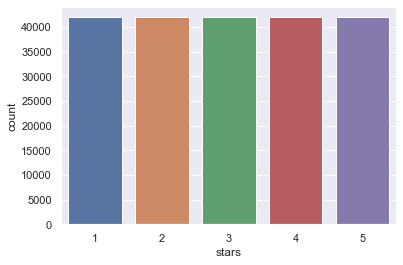

In [10]:
sns.countplot(data = data, x = 'stars')

In [11]:
# vemos que esta distribuido en partes iguales

In [12]:
data.language.value_counts()
# vemos que estan todos los reviews en español

es    210000
Name: language, dtype: int64

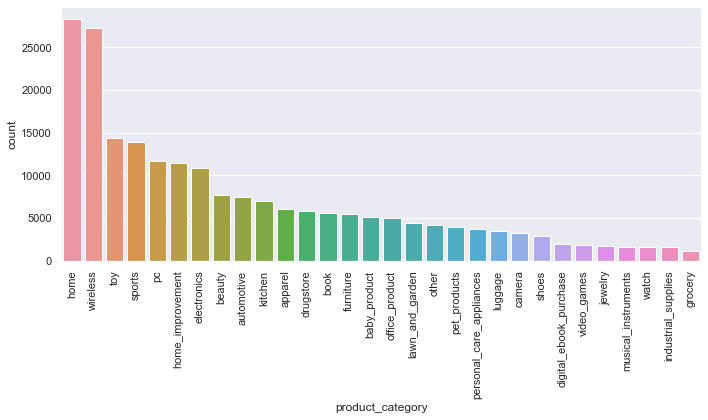

In [53]:
plt.figure(figsize=(10,6))
sns.countplot(x='product_category',data=data,order=data['product_category'].value_counts().index)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [14]:
data.reviewer_id.describe()

count                  210000
unique                 187140
top       reviewer_es_0431022
freq                        7
Name: reviewer_id, dtype: object

In [15]:
# vemos que hay id que se repiten

In [16]:
data.product_id.describe()

count                 210000
unique                156458
top       product_es_0261843
freq                       8
Name: product_id, dtype: object

In [17]:
# vemos que hay productos que se repiten

In [18]:
data['length'] = train.review_body.apply(len)

In [19]:
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,length
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics,94
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics,140
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore,117
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless,332
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes,36


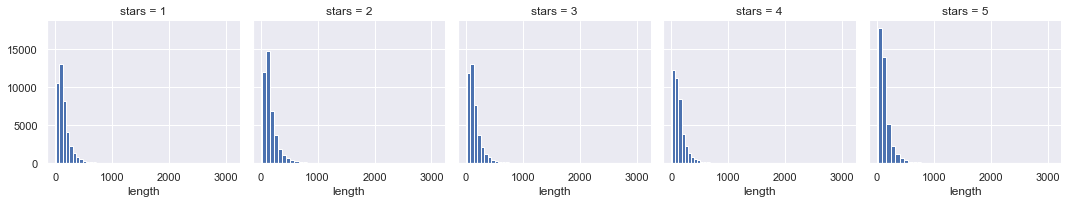

In [20]:
g = sns.FacetGrid(data,col='stars')
g.map(plt.hist,'length',bins=40)

In [21]:
# parecerian tener distribuciones similares
# los comentarios con 5 estrellas tienen menos lenght

<AxesSubplot:xlabel='stars', ylabel='length'>

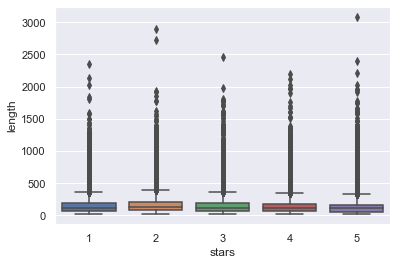

In [22]:
sns.boxplot(x='stars',y='length',data=data)

In [23]:
# faltar ver palabras mas comunes
# falta vocabulario

In [24]:
#limpieza de datos

In [25]:
import nltk
import string
import re

In [26]:
stopwords = nltk.corpus.stopwords.words('spanish')

In [27]:
def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [28]:
data['review_limpio'] = data.review_body.apply(round1)
data['title_limpio'] = data.review_title.apply(round1)

In [29]:
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    text = nltk.word_tokenize(text)
    text = [palabra for palabra in text if len(palabra)>1]
    text = [palabra for palabra in text if not palabra in stopwords]
    return ' '.join(text)

round2 = lambda x: clean_text_round2(x)

In [30]:
data['review_limpio'] = data.review_limpio.apply(round2)
data['title_limpio'] = data.title_limpio.apply(round2)

In [50]:
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,length,review_limpio,title_limpio
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics,94,bueno ka pantalla menos meses recibido respues...,television nevir
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics,140,horrible comprar sabemos inglés informático de...,dinero tirado basura compra
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore,117,obligan comprar dos unidades llega solo forma ...,solo llega unidad obligan comprar dos
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless,332,entro descalificar vendedor solo puedo decir t...,producto recibido
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes,36,llega tarde co talla equivocada,devuelto


In [79]:
datos = data[(data.stars==1) | (data.stars==5)]

In [55]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   review_id         84000 non-null  object
 1   product_id        84000 non-null  object
 2   reviewer_id       84000 non-null  object
 3   stars             84000 non-null  int64 
 4   review_body       84000 non-null  object
 5   review_title      84000 non-null  object
 6   language          84000 non-null  object
 7   product_category  84000 non-null  object
 8   length            84000 non-null  int64 
 9   review_limpio     84000 non-null  object
 10  title_limpio      84000 non-null  object
dtypes: int64(2), object(9)
memory usage: 7.7+ MB


In [56]:
datos_5_stars = datos[datos.stars==5]
datos_1_stars = datos[datos.stars==1]

In [58]:
reviews_5_stars = []
for i in range(datos_5_stars.shape[0]):
    texto = datos_5_stars.iloc[i].review_limpio
    texto = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(texto)
    texto = [word for word in texto if word not in stopwords]
    texto = [palabra for palabra in texto if len(palabra)>2]
    reviews_5_stars.append(texto)

In [59]:
import itertools

In [60]:
reviews_5_stars = list(itertools.chain(*reviews_5_stars))
reviews_5_stars[0:10]

['práctico',
 'voy',
 'vacaciones',
 'preocupar',
 'seguirán',
 'vivas',
 'plantas',
 'vuelva',
 'montaje',
 'sencillo']

In [61]:
freq_5 = nltk.FreqDist(reviews_5_stars)
freq_5

FreqDist({'bien': 9647, 'calidad': 7886, 'buena': 7128, 'precio': 5375, 'perfecto': 4904, 'producto': 4597, 'buen': 4303, 'compra': 2934, 'perfectamente': 2869, 'recomiendo': 2720, ...})

In [62]:
df_5 = pd.DataFrame(list(freq_5.items()), columns = ["Word","Frequency"])
df_5.head()

,Word,Frequency
0,práctico,606
1,voy,217
2,vacaciones,41
3,preocupar,3
4,seguirán,2


In [63]:
df_5.sort_values('Frequency',ascending=False, inplace = True)
df_5.head()

,Word,Frequency
24,bien,9647
22,calidad,7886
31,buena,7128
23,precio,5375
29,perfecto,4904


In [64]:
df_5.reset_index(drop = True, inplace=True)
df_5.head()

,Word,Frequency
0,bien,9647
1,calidad,7886
2,buena,7128
3,precio,5375
4,perfecto,4904


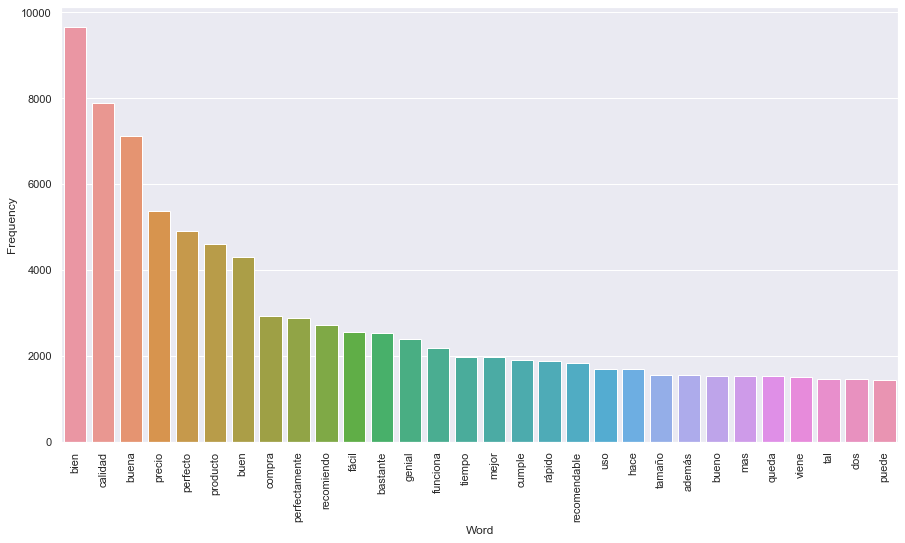

In [65]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_5.iloc[:30].Word, y = df_5.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

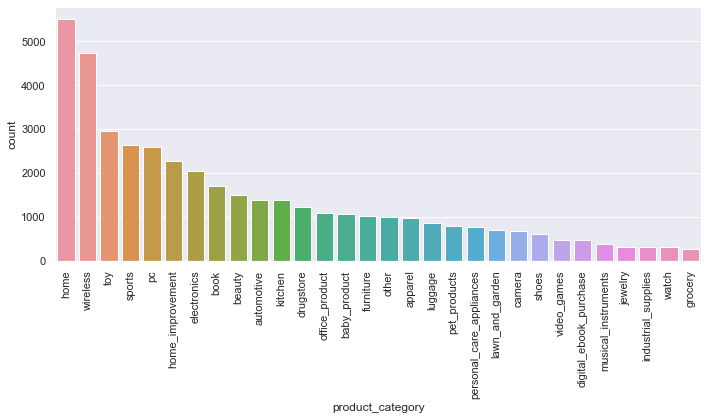

In [66]:
plt.figure(figsize=(10,6))
sns.countplot(x='product_category',data=datos_5_stars,order=datos_5_stars['product_category'].value_counts().index)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [67]:
#hacer lo mismo para 1 estrella

In [68]:
reviews_1_stars = []
for i in range(datos_1_stars.shape[0]):
    texto = datos_1_stars.iloc[i].review_limpio
    texto = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(texto)
    texto = [word for word in texto if word not in stopwords]
    texto = [palabra for palabra in texto if len(palabra)>3]
    reviews_1_stars.append(texto)

In [69]:
reviews_1_stars = list(itertools.chain(*reviews_1_stars))
freq_1 = nltk.FreqDist(reviews_1_stars)
df_1 = pd.DataFrame(list(freq_1.items()), columns = ["Word","Frequency"])
df_1.sort_values('Frequency',ascending=False, inplace = True)
df_1.reset_index(drop = True, inplace=True)
df_1.head()

,Word,Frequency
0,producto,7513
1,bien,4588
2,calidad,4404
3,llegado,3517
4,recomiendo,2941


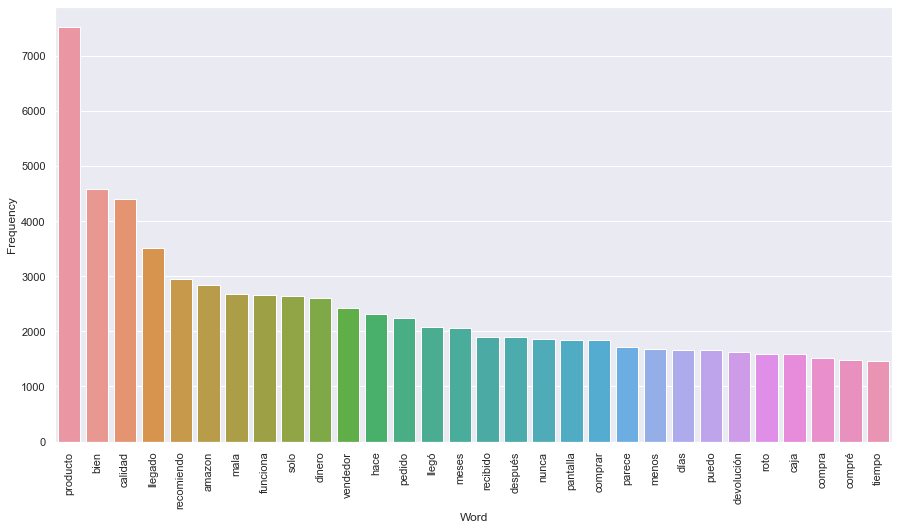

In [70]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_1.iloc[:30].Word, y = df_1.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

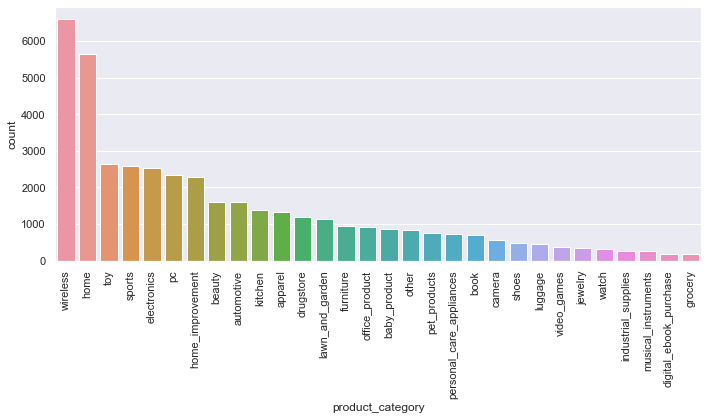

In [71]:
plt.figure(figsize=(10,6))
sns.countplot(x='product_category',data=datos_1_stars,order=datos_1_stars['product_category'].value_counts().index)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [ ]:
# vemos que el tipo de producto no esta muy correlacionado con el puntaje

In [84]:
datos.shape

(84000, 11)

In [85]:
# Empiezo con los modelos

In [86]:
# Primero pruebo con los datos sucios

In [87]:
X = datos['review_body']
y = datos['stars']

In [88]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [89]:
X = cv.fit_transform(X)

In [90]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [93]:
from sklearn.model_selection import cross_val_score

In [94]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [104]:
score_sucio = cross_val_score(nb,X_train,y_train,scoring='accuracy',cv=5).mean()
score_sucio

0.9233163265306121

In [105]:
import sklearn.metrics

In [106]:
from sklearn.metrics import confusion_matrix,classification_report

In [107]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def confusion(ytest,y_pred):
    names=["5 stars","1 star"]
    cm=confusion_matrix(ytest,y_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

In [108]:
# ahora pruebo con los datos limpios

In [129]:
X = datos['review_limpio']
y = datos['stars']

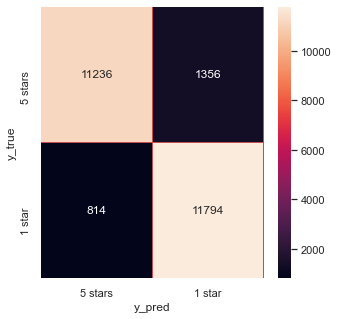

In [130]:
X = cv.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)
nb.fit(X_train,y_train)
predictions = nb.predict(X_test)
confusion(y_test,predictions)

In [131]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.93      0.89      0.91     12592
           5       0.90      0.94      0.92     12608

    accuracy                           0.91     25200
   macro avg       0.91      0.91      0.91     25200
weighted avg       0.91      0.91      0.91     25200



In [132]:
cross_val_score(nb,X_train,y_train,cv=5,scoring='accuracy').mean()

0.9090306122448979

In [133]:
# vemos que el score es peor que antes con los datos sucios

In [134]:
# Usaremos solo las 1000 palabras con mas frecuencia en todo el corpus para generar los vectores
max_features=1000

# Es decir que cada instancia tendrá 1000 features
cou_vec=CountVectorizer(max_features=max_features) # stop_words="english" , ngram_range=(1, 2)

In [135]:
list_reviews = list(datos['review_limpio'].values)
stars = datos['stars'].values


In [136]:
matriz_reviews = cou_vec.fit_transform(list_reviews)

# Tomamos las palabras
all_words = cou_vec.get_feature_names()

# Vizualizamos las 50 palabras mas usadas
print("50 palabras mas usadas: ",all_words[0:50])

50 palabras mas usadas:  ['abajo', 'abierta', 'abierto', 'abre', 'abrir', 'absolutamente', 'absoluto', 'acaba', 'acabado', 'acabados', 'acabo', 'accesorios', 'aceite', 'aceptable', 'acierto', 'aconsejo', 'adapta', 'adaptador', 'adecuado', 'ademas', 'además', 'agradable', 'agua', 'aguanta', 'agujeros', 'ahora', 'ahí', 'aire', 'ajusta', 'alguien', 'alguna', 'algún', 'alta', 'altavoz', 'alto', 'altura', 'amazon', 'anterior', 'anuncio', 'apaga', 'aparato', 'aparece', 'aparte', 'apenas', 'aplicación', 'app', 'apple', 'aquí', 'arriba', 'articulo']


In [140]:

from sklearn.svm import LinearSVC

svc = LinearSVC(C = 1)
svc.fit(X_train,y_train)
svc.score(X_test,y_test)

0.9132539682539682

In [141]:
# Usaremos solo las 1000 palabras con mas frecuencia en todo el corpus para generar los vectores
max_features=1000

# Es decir que cada instancia tendrá 1000 features
cou_vec2=CountVectorizer(max_features=max_features,ngram_range=(2, 2)) # stop_words="english" , ngram_range=(1, 2)

In [142]:
matriz_reviews = cou_vec2.fit_transform(list_reviews)

# Tomamos las palabras
all_words = cou_vec2.get_feature_names()

# Vizualizamos las 50 palabras mas usadas
print("50 palabras mas usadas: ",all_words[0:50])

50 palabras mas usadas:  ['abrir caja', 'abrir paquete', 'acabo recibir', 'acero inoxidable', 'aconsejo compra', 'adapta bien', 'adapta perfectamente', 'adaptan bien', 'además ser', 'además viene', 'agradable tacto', 'agua caliente', 'aguanta bien', 'aguanta peso', 'ahora funciona', 'ahora mismo', 'ahora puedo', 'ajusta bien', 'ajusta perfectamente', 'ajustan bien', 'alguna vez', 'alta calidad', 'amazon debería', 'amazon prime', 'amazon siempre', 'aparece foto', 'apple watch', 'arriba abajo', 'así puedo', 'así recomiendo', 'atención cliente', 'aun asi', 'aun así', 'aun esperando', 'aun llegado', 'aun recibido', 'año medio', 'año uso', 'años encantado', 'aún así', 'aún esperando', 'aún llegado', 'aún recibido', 'aún sigo', 'baja calidad', 'barato sale', 'bastante bien', 'bastante buena', 'bastante bueno', 'bastante calidad']


In [143]:
x = matriz_reviews.toarray()
y = stars

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [144]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C = 1)
svc.fit(xtrain,ytrain)
svc.score(xtest,ytest)

0.7470833333333333

In [145]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(xtrain,ytrain)
print("acc : ", nb.score(xtest,ytest))

acc :  0.7458928571428571


In [196]:
#probar con mas features

In [146]:
from sklearn.feature_extraction.text import  TfidfTransformer

In [147]:
from sklearn.pipeline import Pipeline

In [148]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', MultinomialNB()),
])

In [149]:
X = datos['review_body']
y =datos['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [150]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [151]:
predictions = pipeline.predict(X_test)

In [152]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[11623   969]
 [  939 11669]]
              precision    recall  f1-score   support

           1       0.93      0.92      0.92     12592
           5       0.92      0.93      0.92     12608

    accuracy                           0.92     25200
   macro avg       0.92      0.92      0.92     25200
weighted avg       0.92      0.92      0.92     25200

